In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
events_df = pd.read_csv('./Event Description Mapping.csv')
description_df = pd.read_csv('./User - Event Raw Dataset.csv')

In [25]:
merged_df = pd.merge(events_df, description_df, on='Event')
null_counts = merged_df.isnull().sum()
merged_df = merged_df.dropna(subset=['project_id'])

In [26]:
event_counts = merged_df['user_id'].value_counts()

In [27]:
merged_df['created_at_time'] = pd.to_datetime(merged_df['created_at_time'], format='%d-%m-%Y %H:%M')
merged_df['hour_of_day'] = merged_df['created_at_time'].dt.hour
hourly_event_counts = merged_df['hour_of_day'].value_counts().sort_index()

In [28]:
merged_df['created_at_time'] = pd.to_datetime(merged_df['created_at_time'], format='%d-%m-%Y %H:%M')
merged_df['month_year'] = merged_df['created_at_time'].dt.month
month_event_counts = merged_df['hour_of_day'].value_counts().sort_index()

In [29]:
user_event_counts = merged_df.groupby('user_id')['Event'].count()

In [30]:
event_section_mapping = merged_df[['Event', 'Section']].drop_duplicates()
projectId_userId_mapping = merged_df[['project_id', 'user_id']].drop_duplicates()

In [35]:
event_sequence = merged_df.groupby(['user_id'])['Event'].apply(list)


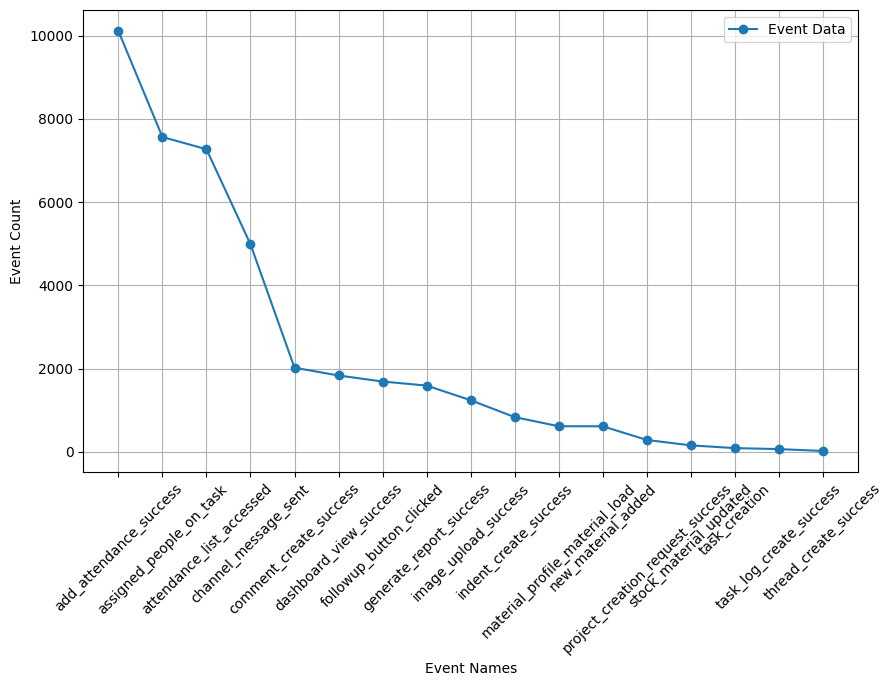

In [79]:

event_names = events_df['Event'].unique()
plt.figure(figsize=(10, 6))
plt.plot(event_names, event_counts, marker='o', linestyle='-', label="Event Data")

plt.xlabel('Event Names')
plt.ylabel('Event Count')

plt.legend(["Event Data"])

plt.xticks(rotation=45)

plt.grid(True)
plt.show()


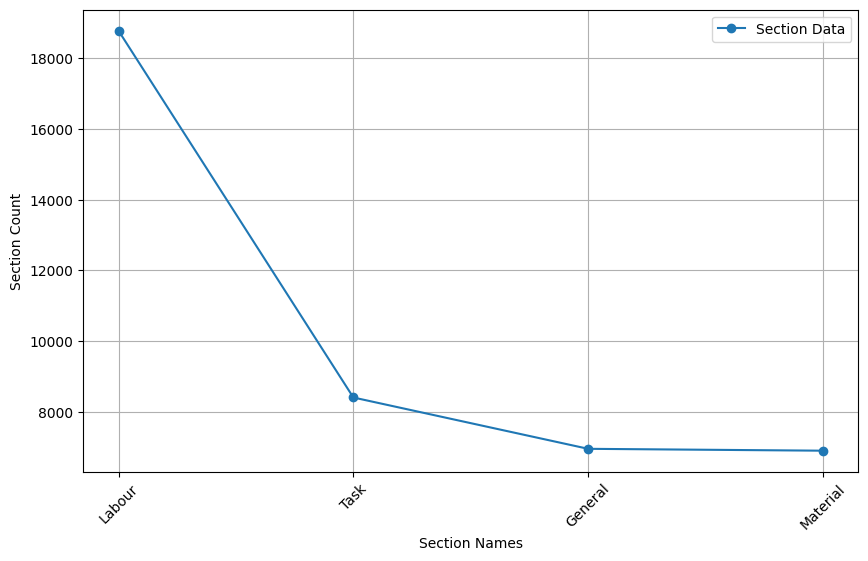

In [80]:
section_names = events_df['Section'].unique()
section_counts = merged_df['Section'].value_counts()
plt.figure(figsize=(10, 6))
plt.plot(section_names, section_counts, marker='o', linestyle='-', label="Event Data")

plt.xlabel('Section Names')
plt.ylabel('Section Count')

plt.legend(["Section Data"])

plt.xticks(rotation=45)

plt.grid(True)
plt.show()

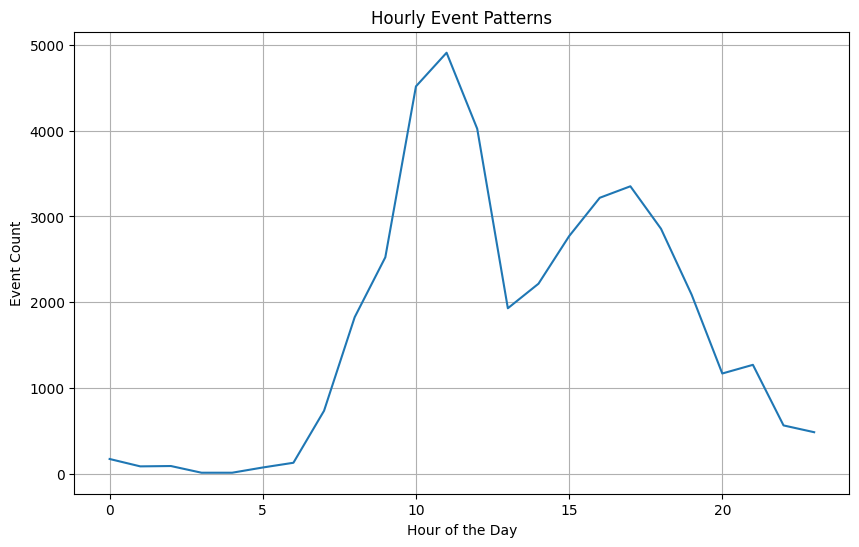

In [39]:
# Plot a line graph of hourly event counts
hourly_event_counts.plot(kind='line', figsize=(10, 6))
plt.xlabel('Hour of the Day')
plt.ylabel('Event Count')
plt.title('Hourly Event Patterns')
plt.grid()
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17916\4211318254.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attendance_data['hour_of_day'] = attendance_data['created_at_time'].dt.hour


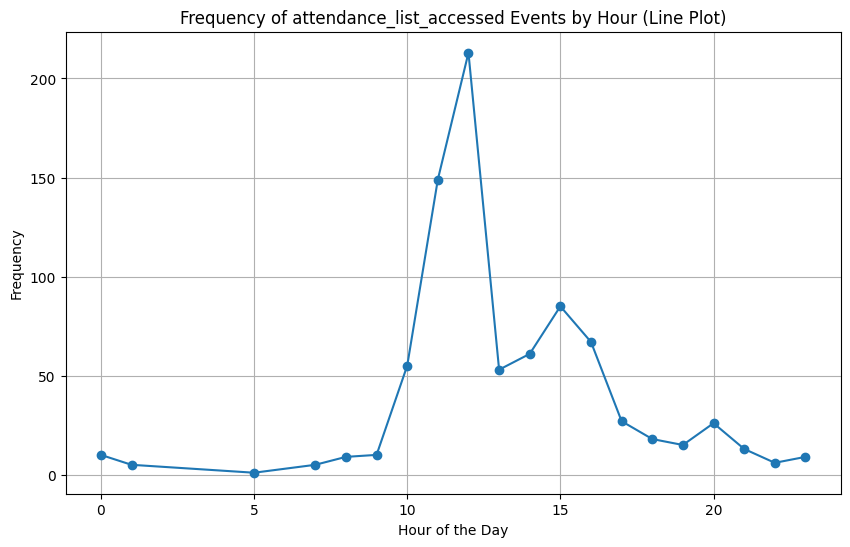

In [86]:
merged_df['created_at_time'] = pd.to_datetime(merged_df['created_at_time'], format='%d-%m-%Y %H:%M')

attendance_data = merged_df[merged_df['Event'] == 'attendance_list_accessed']

attendance_data['hour_of_day'] = attendance_data['created_at_time'].dt.hour

hourly_counts = attendance_data['hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Frequency of attendance_list_accessed Events by Hour (Line Plot)')
plt.grid(True)
plt.show()

In [36]:

# Convert the 'created_at_time' column to datetime
merged_df['created_at_time'] = pd.to_datetime(merged_df['created_at_time'], format='%Y-%m-%d')

# Filter data for 2022
df_2022 = merged_df[merged_df['created_at_time'].dt.year == 2022]

# Filter data for 2023
df_2023 = merged_df[merged_df['created_at_time'].dt.year == 2023]

# Find unique org_id values in 2022
unique_org_id_2022 = df_2022['org_id'].unique()

# Find unique org_id values in 2023
unique_org_id_2023 = df_2023['org_id'].unique()

# Find org_id values in 2023 that are not in 2022
org_id_2023_not_in_2022 = set(unique_org_id_2023) - set(unique_org_id_2022)

# Number of unique org_id values in 2022
num_unique_org_id_2022 = len(unique_org_id_2022)

# Number of unique org_id values in 2023 not in 2022
num_org_id_2023_not_in_2022 = len(org_id_2023_not_in_2022)

print(f'Number of unique org_id values in 2022: {num_unique_org_id_2022}')
print(f'Number of unique org_id values in 2023 not in 2022: {num_org_id_2023_not_in_2022}')


Number of unique org_id values in 2022: 380
Number of unique org_id values in 2023 not in 2022: 1


    Month  Event Count
0       1          911
1       2         2689
2       3         4439
3       4         4078
4       5         4888
5       6         5264
6       7         3396
7       8         2820
8       9         2303
9      10         2006
10     11         2805
11     12         2583


C:\Users\lenovo\AppData\Local\Temp\ipykernel_1216\1747735082.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['month'] = df_2023['created_at_time'].dt.month


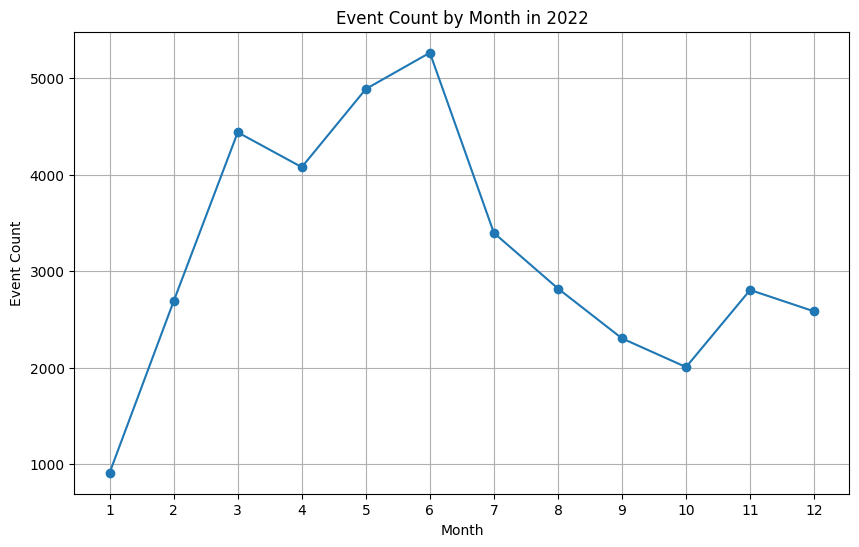

In [37]:

# Convert the 'created_at_time' column to datetime
merged_df['created_at_time'] = pd.to_datetime(merged_df['created_at_time'], format='%Y-%m-%d')

# Filter the data for the year 2023
df_2023 = merged_df[merged_df['created_at_time'].dt.year == 2022]

# Extract the month from the 'created_at_time' column
df_2023['month'] = df_2023['created_at_time'].dt.month

# Count the number of events for each month
monthly_event_counts = df_2023['month'].value_counts().sort_index()

# Create a DataFrame to store the results
monthly_analysis = pd.DataFrame({
    'Month': monthly_event_counts.index,
    'Event Count': monthly_event_counts.values
})

# Sort the DataFrame by month
monthly_analysis = monthly_analysis.sort_values(by='Month')

print(monthly_analysis)

plt.figure(figsize=(10, 6))
plt.plot(monthly_analysis['Month'], monthly_analysis['Event Count'], marker='o')
plt.title('Event Count by Month in 2022')
plt.xlabel('Month')
plt.ylabel('Event Count')
plt.grid(True)
plt.xticks(monthly_analysis['Month'])
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_1216\3487840434.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['month'] = df_2022['created_at_time'].dt.month


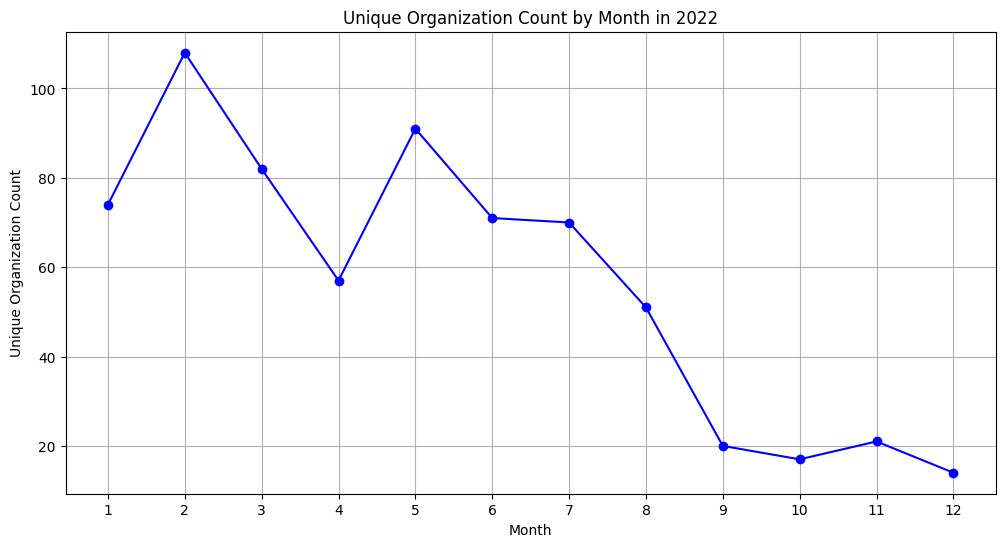

In [38]:

# Convert the 'created_at_time' column to datetime
merged_df['created_at_time'] = pd.to_datetime(merged_df['created_at_time'], format='%Y-%m-%d')

# Filter the data for the year 2022
df_2022 = merged_df[merged_df['created_at_time'].dt.year == 2022]

# Extract the month from the DataFrame
df_2022['month'] = df_2022['created_at_time'].dt.month

# Find unique org_id values for each month
unique_org_ids_by_month = df_2022.groupby('month')['org_id'].nunique()

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(unique_org_ids_by_month.index, unique_org_ids_by_month.values, marker='o', linestyle='-', color='b')
plt.title('Unique Organization Count by Month in 2022')
plt.xlabel('Month')
plt.ylabel('Unique Organization Count')
plt.grid(True)
plt.xticks(unique_org_ids_by_month.index)
plt.show()


In [41]:


# Group the data by 'org_id' and count the number of unique 'project_id' values
unique_projects_per_org = merged_df.groupby('org_id')['project_id'].nunique().sort_values()

# Display the result
print(unique_projects_per_org)


org_id
ORG-2nufoaj370k     1
ORG2s3a9zbsog0o     1
ORG2sfdvxwhefs9     1
ORG2w25ay8ya529     1
ORG2y7mcu-6riy3     1
                   ..
ORG455805410252    22
ORG4s0uwwbypr6d    28
ORG183381607282    28
ORG400468153021    33
ORG588585401431    40
Name: project_id, Length: 381, dtype: int64
